<h1> The Guardian News: An Analysis </h1>

This notebook will show some exploratory analysis of content published to the Guardian website from Jan 2017 to June 2020.

The dataset used was extracted from the [Guardian's content API](https://open-platform.theguardian.com/).  
A query for the full days content was pulled for each day over the time period. 
The extracted JSON files were combined and processed to the csv file read in this notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
filename = Path.cwd().parent.joinpath('data', 'interim', 'cleaned_2017_2020.csv')
datatypes = {'charCount': 'int32',
             'wordcount': 'int32',
             'productionOffice': 'category',
             'pillarName': 'category',
             'type': 'category',
             'publication': 'category',
             'sectionName': 'category'}

In [3]:
df = pd.read_csv(filename, dtype = datatypes)

In [4]:
df.webPublicationDate = pd.to_datetime(df.webPublicationDate)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277050 entries, 0 to 277049
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Unnamed: 0          277050 non-null  int64              
 1   type                277050 non-null  category           
 2   sectionName         277050 non-null  category           
 3   webPublicationDate  277050 non-null  datetime64[ns, UTC]
 4   webTitle            277050 non-null  object             
 5   pillarName          274416 non-null  category           
 6   headline            277050 non-null  object             
 7   byline              268868 non-null  object             
 8   webUrl              277050 non-null  object             
 9   bodyText            272442 non-null  object             
 10  wordcount           277050 non-null  int32              
 11  publication         277050 non-null  category           
 12  charCount       

article        95.82
liveblog        2.68
crossword       1.02
interactive     0.47
gallery         0.00
video           0.00
Name: type, dtype: float64


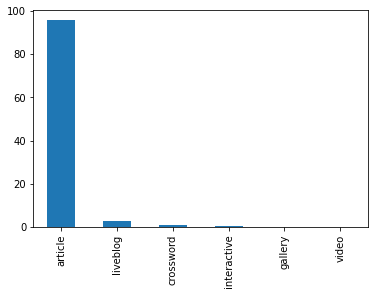

In [6]:
type_pc = (round(df.type.value_counts(sort=True)*100/df.shape[0], 2))
print(type_pc)
type_pc.plot.bar()

The majority of the content are articles.

As I am interested in articles, I will limit the analysis to article types and drop the 'type' column.

In [7]:
df = df[df['type']=='article']
df.drop('type', axis=1, inplace=True)

-----------------------------------------------------------------------------------
The Guardian News publishes in the main Guardian newspaper (Monday to Saturday), The Observer newspaper on Sundays and online exclusive content to guardian.com.

The proportions are as follows:

In [72]:
def category_percentage(dataframe, column):
    '''
    parameter: column as string
    
    return: pandas.Series of percentages of total dataframe
    '''
    return round(dataframe[column].value_counts(sort=True)*100/dataframe.shape[0], 2)

The Guardian       49.78
theguardian.com    40.03
The Observer       10.19
Name: publication, dtype: float64


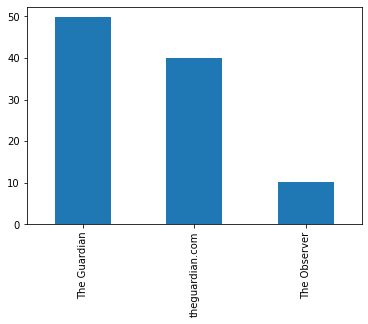

In [71]:
publication_pc = category_percentage(df, 'publication')
print(publication_pc)
publication_pc.plot.bar()

It appears approximately 40 per cent of the content is from theguardian.com, i.e. published online exclusively and not in either of the print publications.

News         48.67
Arts         18.83
Sport        13.90
Opinion       8.83
Lifestyle     8.79
Name: pillarName, dtype: float64


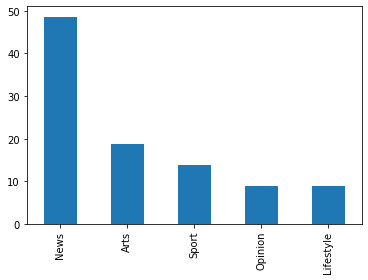

In [73]:
pillar_pc = category_percentage(df, 'pillarName')
print(pillar_pc)
pillar_pc.plot.bar()

Conent at the Guardian is broadly categorised into "pillars". 

Clearly the most frequent content falls under the News pillar.

-----------------------------------------------------------------
## Investigate the word count property of articles:


In [10]:
df.wordcount.describe()

count    265482.000000
mean        777.113273
std         499.235364
min           0.000000
25%         481.000000
50%         706.000000
75%         947.000000
max       26801.000000
Name: wordcount, dtype: float64

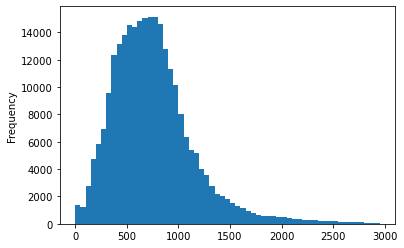

In [32]:
df.wordcount.plot.hist(bins = [*range(0, 3000, 50)])

The overall distribution shows the majority of articles are between 500 and 1000 words.

There is long tail towards high word counts. These long-form journalism pieces (known as Guardian Long Reads) are relatively few in number.

In [30]:
print(f'Proportion of pieces longer than 2000 words {round(df[df["wordcount"]>2000].shape[0]*100/df.shape[0], 2)} %')
print(f'Proportion of pieces longer than 1500 words {round(df[df["wordcount"]>1500].shape[0]*100/df.shape[0], 2)} %')

Proportion of pieces longer than 2000 words 2.23 %
Proportion of pieces longer than 1500 words 5.45 %


How does word count vary across pillar categories?

(-100.0, 2000.0)

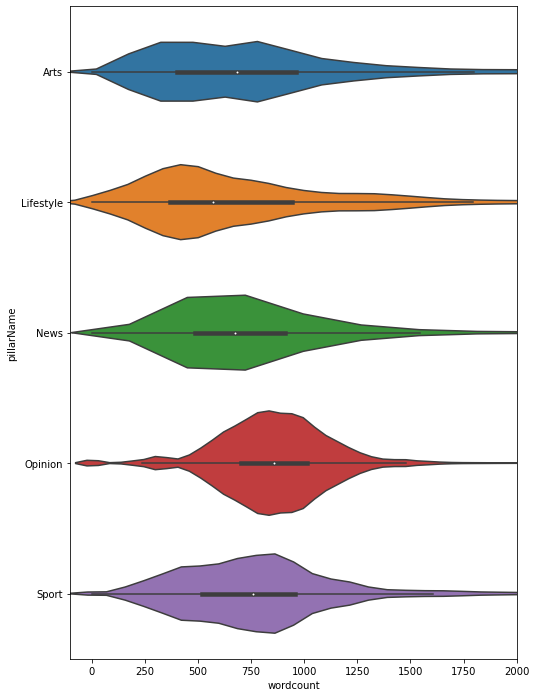

In [47]:
plt.figure(figsize = (8, 12))
sns.violinplot(y = 'pillarName', 
               x = 'wordcount', 
               data = df,
               orient='h')
plt.xlim(-100, 2000)

### Observations:
- The opinion articles are most consistant in terms of article length and longest on average. 
- The distribution of opinion pieces is double peaked, with a smaller peak at approx 300 words. I assume these are editorial pieces.
- Sports and Arts pieces vary in length most substationally.
- Lifestyle conent is generally the shortest in length.

(-100.0, 2000.0)

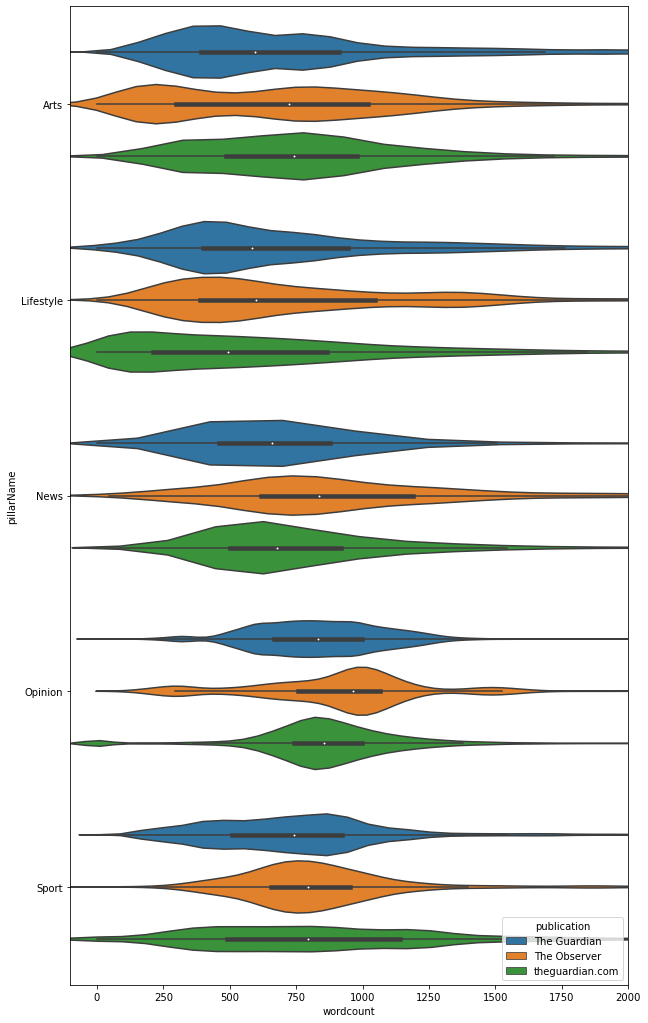

In [37]:
plt.figure(figsize = (10, 18))
sns.violinplot(y = 'pillarName', 
               x = 'wordcount', 
               data = df, 
               hue = 'publication',
               orient='h')
plt.xlim(-100, 2000)

### Observations:

- The Observer generally allows for longer word counts on articles than The Guardian (which makes sense as it is a longer publication). This is especially the case for News and Opinion pieces.
- 

In [52]:
df.byline.value_counts().head(15)

Letters                                         6241
Editorial                                       2181
Guardian sport                                  2016
Paul Karp                                       1611
Peter Bradshaw                                  1431
Katharine Murphy Political editor               1179
Guardian readers                                1100
Corrections and clarifications column editor    1025
Alison Flood                                    1001
Peter Walker Political correspondent             990
Steven Morris                                    939
Guardian staff                                   921
Christopher Knaus                                909
John Crace                                       867
Sarah Butler                                     844
Name: byline, dtype: int64

In [50]:
df[df['byline']=='Editorial'].wordcount.describe()

count    2181.000000
mean      610.933517
std       131.654474
min       153.000000
25%       545.000000
50%       610.000000
75%       684.000000
max      1791.000000
Name: wordcount, dtype: float64

In [53]:
df[df['byline']=='Letters'].wordcount.describe()

count    6241.000000
mean      449.670566
std       298.565615
min        90.000000
25%       272.000000
50%       352.000000
75%       532.000000
max      5879.000000
Name: wordcount, dtype: float64

In [56]:
df.groupby('byline')

In [57]:
df_day = df.resample('D', on = 'webPublicationDate')

In [86]:
def plot_timecounts(dataframe, resample_period):
    """
    Resample the dataframe over the given time period and determine the publication counts over that period.
    Create scatter plot of this data.

    Parameters
    ----------
    dataframe : dataframe
        Dataframe to be acted on.
    resample_period : str
        Period of time to resample data over ('D' for days, 'W' for weeks, 'M' for months.

    Returns
    -------
    Scatterplot of the publication counts over resampled time periods.
    """
    
    df_tmp = dataframe.resample(resample_period, on = 'webPublicationDate')
    x = df_tmp['webPublicationDate'].first()
    y = df_tmp.publication.count()
    return sns.scatterplot(x,y)
    

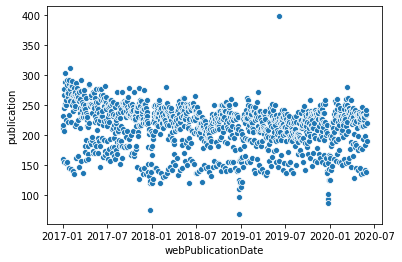

In [79]:
plot_timecounts(df, 'D')

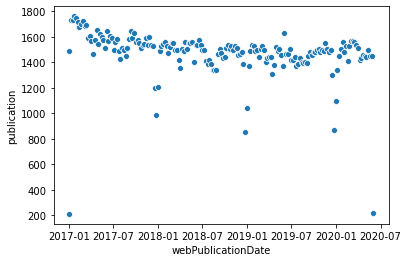

In [80]:
plot_timecounts(df, 'W')  #  Grouped by week

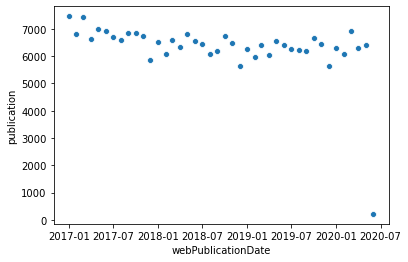

In [81]:
plot_timecounts(df, 'M')

UK     78.78
AUS    11.21
US     10.02
Name: productionOffice, dtype: float64


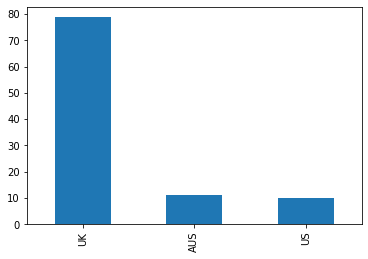

In [76]:
office_pc = category_percentage(df, 'productionOffice')
print(office_pc)
office_pc.plot.bar()